# NAME-SAKSHI JAISWAL

# Task 1- Linear Regression with Python Scikit Learn

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Checking out the data**

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# EDA

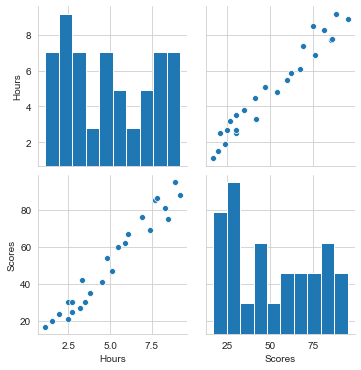

In [5]:
sns.set_style('whitegrid')
sns.pairplot(data)

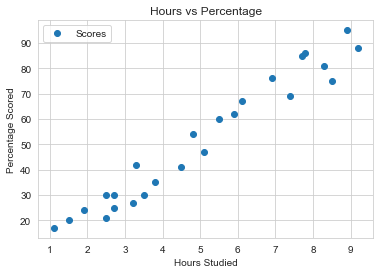

In [6]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

**From the above graph we can see that there is a positive relation between the number of hours studied and marks scored** 

# Preparing the data

In [7]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

**Train Test Split**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=101) 

# Creating and training a model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()
lm.fit(x_train,y_train)
print("Training complete.")

Training complete.


In [12]:
print(lm.intercept_)

2.5121292983200902


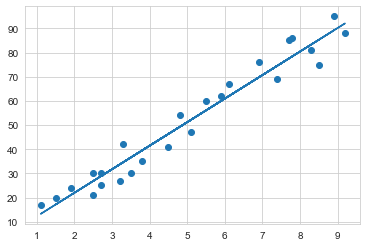

In [13]:
plt.scatter(x, y)
plt.plot(x, lm.coef_*x+lm.intercept_);
plt.show()

# Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [14]:
print(x_test)
y_pred=lm.predict(x_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]


In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


In [16]:
hours = 9.25
hrs=np.array(hours).reshape(-1,1)
pred = lm.predict(hrs)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 92.54521954029958


**If a student studies for 9.25 hours,predicted score is 92.54521954029958**

# Evaluating the model

In [17]:
from sklearn import metrics

In [18]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.937597792467706
